# Introdução

Este notebook traz os elementos iniciais do curso de Visão Computacional. A ideia aqui é mostrar os elementos básicos das imagens e como tratá-las de maneira simples.

Usaremos em todo o curso a linguagem Python, as bibliotecas OpenCV (https://opencv.org/) e NumPy (https://numpy.org/), além de outras, é claro.

Este e outros notebooks são inspirados nos códigos fornecidos no curso Gurus Course da PyImageSearch (https://www.pyimagesearch.com/) e no livro Computer Vision: Algorithms and Applications (2nd Edition) de
Richard Szeliski (http://szeliski.org/Book/).



# Importar bibliotecas. 

OpenCV (*Open Source Computer Vision Library*) é uma biblioteca *open source* de Visão Computacional e Aprendizado de Máquina. Ela foi criada para fornecer uma infraestrutura comum para aplicações de Visão Computacional e para acelerar o uso da percepção de máquina em aplicações e produtos comerciais.

Em Python, `cv2` é o openCV.

*Disclaimer: devido a uma incompatibilidade com o Google Colab, é necessário também importar uma função específica para mostrar as imagens na tela (cv2_imshow equivalente a cv2.imshow)*

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

#from google.colab import drive
#drive.mount('/content/gdrive')


In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1MyWOj5uIYRT_CrUoJaVFK3hbVpOHG80_' -O imagem.jpg

--2022-01-17 19:44:57--  https://docs.google.com/uc?export=download&id=1MyWOj5uIYRT_CrUoJaVFK3hbVpOHG80_
Resolving docs.google.com (docs.google.com)... 173.194.216.139, 173.194.216.113, 173.194.216.101, ...
Connecting to docs.google.com (docs.google.com)|173.194.216.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-9g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/28eldmgj9s1tep977s650obnuejs8uho/1642448625000/08309889473690119428/*/1MyWOj5uIYRT_CrUoJaVFK3hbVpOHG80_?e=download [following]
--2022-01-17 19:44:57--  https://doc-10-9g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/28eldmgj9s1tep977s650obnuejs8uho/1642448625000/08309889473690119428/*/1MyWOj5uIYRT_CrUoJaVFK3hbVpOHG80_?e=download
Resolving doc-10-9g-docs.googleusercontent.com (doc-10-9g-docs.googleusercontent.com)... 142.250.97.132, 2607:f8b0:400c:c18::84
Connecting to doc-10-9g-docs.googleusercontent.com (doc-10-

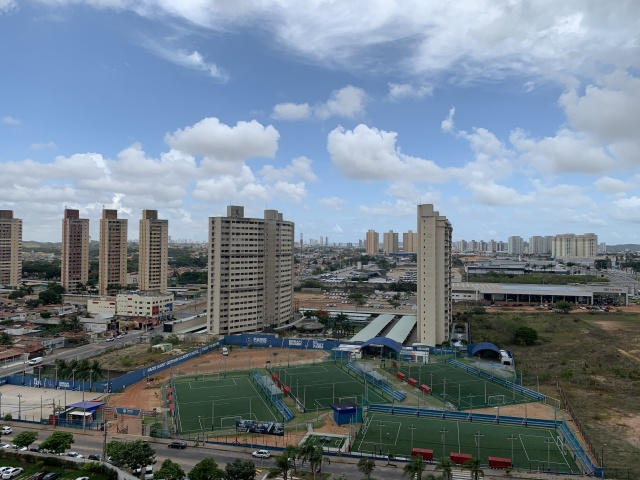

In [ ]:
image = cv2.imread('imagem.jpg')
cv2_imshow(image)

# Carregar imagens

Para carregar imagens, usamos a função cv2.imread. Basta passar o caminho da imagem.

O primeiro passo para entender a representação de uma imagem é saber como funcionam o sistema de coordenadas e o esquema de cores. 

As imagens são representadas em um *grid* 2D em que uma tupla (x,y) indica a posição dentro desse grid. O ponto inicial da imagem (0,0) está no canto superior esquerdo. Quando incrementamos o valor de *x*, estamos "descendo" na imagem; da mesma maneira, quando aumentamos o valor de *y* estamos indo mais para a direita.

Para mostrar isso, vamos mudar o valor dos pixels do canto superior esquerdo para a cor vermelha.

As mensagens impressas mostram que o valor do pixel foi mudado e isso pode ser visto na figura mostrada novamente (olhe atentamente para o canto superior esquerdo).

In [ ]:
# Carrega uma imagem

#image = cv2.imread('imagem.jpg')
image = cv2.imread('/content/gdrive/MyDrive/01 - Processamento de Imagem/imagem.jpg')

# Extrai a altura e a largura da imagem. Em geral, as imagens são mencionadas no
# formato (largura,altura), mas o OpenCV usa a representação (altura,largura). 
# Isso é muito importante de ser observado.
(h, w) = image.shape[:2]

# Mostra a imagem na tela. 
cv2_imshow(image)

# Mostra as dimensões da imagem
print(f'Height: {h}')
print(f'Width: {w}')

# As imagens são NumPy arrays. O canto superior da imagem está na posição (0, 0)
(b, g, r) = image[0, 0]
print("Pixel em (0, 0) - Red: {r}, Green: {g}, Blue: {b}".format(r=r, g=g, b=b))

AttributeError: ignored

Pixel em (0, 0) - Red: 255, Green: 0, Blue: 0


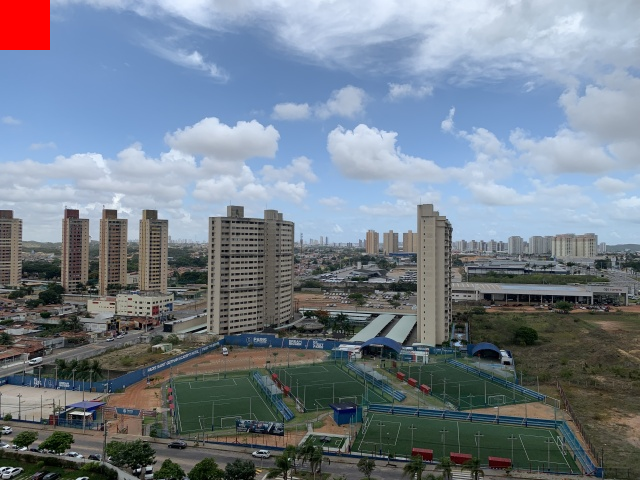

In [ ]:
# Como estamos usando NumPy array, podemos aplicar o recurso de fatiamento e usar
# pedaçoes maiores.

# Mudarmos os 50 pixels iniciando na posição (0,0) para vermelho
image[0:50, 0:50] = (0, 0, 255)
(b, g, r) = image[0, 0]
print("Pixel em (0, 0) - Red: {r}, Green: {g}, Blue: {b}".format(r=r, g=g, b=b))
cv2_imshow(image)

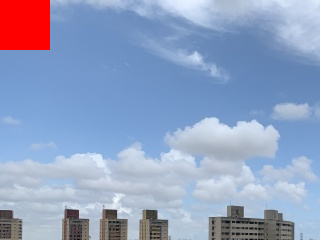

In [ ]:
# Se quisermos, podemos pegar pedaços ainda maiores. Vamos dividir a imagem em 4
# partes.

# Obter o centro da imagem.
(cX, cY) = (w // 2, h // 2)

# Quadrante superior esquerdo.
tl = image[0:cY, 0:cX]
cv2_imshow(tl)

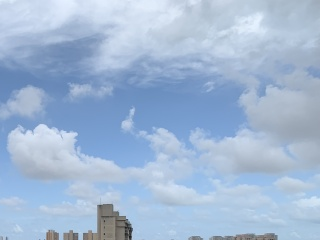

In [ ]:
# Quadrante superior direito
tr = image[0:cY, cX:w]
cv2_imshow(tr)

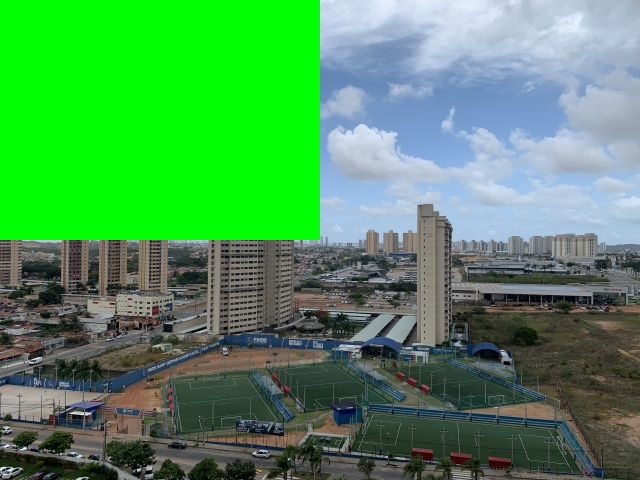

In [ ]:
# Se quisermos, podemos mudar as cores de todo um quadrante. 
# Vamos deixar o quadrante superior esquerdo todo com a cor verde.
image[0:cY, 0:cX] = (0, 255, 0)

cv2_imshow(image)

# Desenhando

Outro recurso muito importante é o fato de podermos desenhar na imagem. Esse tipo de procedimento é muito utilizado em computação gráfica, mas é também útil quando queremos anotar as nossas imagens com informações extraídas a partir da Visão Computacional.

Por exemplo, se queremos destacar alguma parte da imagem, é importante que utilizemos um recurso visual para mostrar ao usuário o que estamos querendo destacar.

Vamos ver algumas formas simples para iniciar.

## Linhas e Retângulos

In [ ]:
# Importando a biblioteca NumPy
import numpy as np

# Vamos iniciar com uma tela "limpa" contendo três canais (RGB) e um fundo 
# escuro (todos os pixels são configurados para o valor 0).
canvas = np.zeros((300, 300, 3), dtype="uint8")

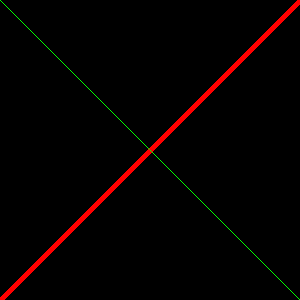

In [ ]:
# Primeiro, vamos desenhar uma linha verde na diagonal secundária da imagme.

# Defindo a cor verde dentro do esquema RGB.
green = (0, 255, 0)

# Desenhando a linha iniciando no ponto (0,0) e terminando no ponto (300,300).
cv2.line(canvas, (0, 0), (300, 300), green)
cv2_imshow(canvas)

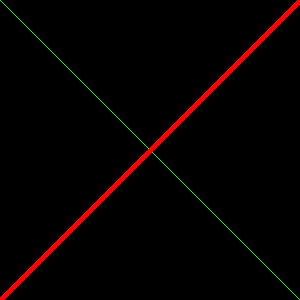

In [ ]:
# Agora, em cima da mesma imagem vamos desenhar uma linha vermelha com 3 pixels
# de espessura na diagonal principal da iamgem.

# Configurando a cor vermelha.
red = (0, 0, 255)

# Desenhando a linha
cv2.line(canvas, (300, 0), (0, 300), red, 3)

cv2_imshow(canvas)

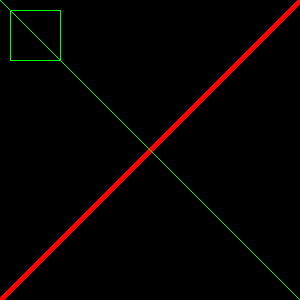

In [ ]:
# Partimos agora para retângulos. 

# Para desenhar um retângulo, basta informar os cantos superior esquerdo e inferior
# direito dele. Nesse caso, vamos fazer um iniciando em (10,10) e terminando em
# (60,60).

cv2.rectangle(canvas, (10, 10), (60, 60), green)
cv2_imshow(canvas)

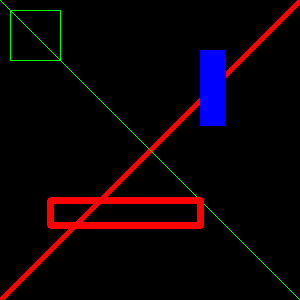

In [ ]:
# Desenhando mais dois retângulos.

# um com 5 pixels de espessura na linha.
cv2.rectangle(canvas, (50, 200), (200, 225), red, 5)

# e um com a cor azul e preenchido... note o último parâmetro
blue = (255, 0, 0)
cv2.rectangle(canvas, (200, 50), (225, 125), blue, -1)

cv2_imshow(canvas)

## Círculos

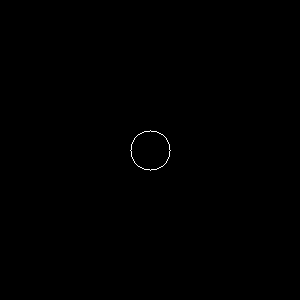

In [ ]:
# Vamos resetar nossa tela e desenhar um círculo com linha branca a partir do centro
# da imagem.
canvas = np.zeros((300, 300, 3), dtype="uint8")

# Obtendo o centro da imagem.
(centerX, centerY) = (canvas.shape[1] // 2, canvas.shape[0] // 2)

# Definindo a cor branca.
white = (255, 255, 255)

# Desenhando o círculo com raio 20.
cv2.circle(canvas, (centerX, centerY), 20, white)

cv2_imshow(canvas)

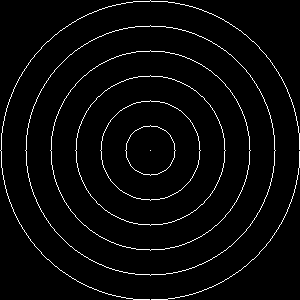

In [ ]:
# Podemos desenhar quantos círculos quisermos. 

# Resentando a tela e desenhando círculos a partir do centro da imagem com raio
# crescente - de 25 pixels até 150 pixels.

canvas = np.zeros((300, 300, 3), dtype="uint8")

(centerX, centerY) = (canvas.shape[1] // 2, canvas.shape[0] // 2)

white = (255, 255, 255)

for r in range(0, 175, 25):
	cv2.circle(canvas, (centerX, centerY), r, white)

cv2_imshow(canvas)

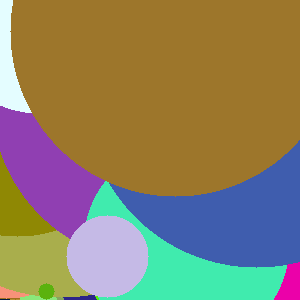

In [ ]:
# Para finalizar, vamos desenhar 25 círculos aleatórios.

for i in range(0, 25):
  # aleatoriamente geramos raios entre 5 e 200, cores e um ponto da imagem para
  # desenhar os círculos.
  radius = np.random.randint(5, high=200)
  color = np.random.randint(0, high=256, size = (3,)).tolist()
  pt = np.random.randint(0, high=300, size = (2,))
	
  # desenhando o círculo gerado aleatoriamente.
  cv2.circle(canvas, tuple(pt), radius, color, -1)

cv2_imshow(canvas)

# Anotação

Como foi mencionado anteriormente, podemos utilizar os recursos de desenho para anotar nossas próprias imagens.

A seguir, você pode ver como isso é feito em uma imagem minha.

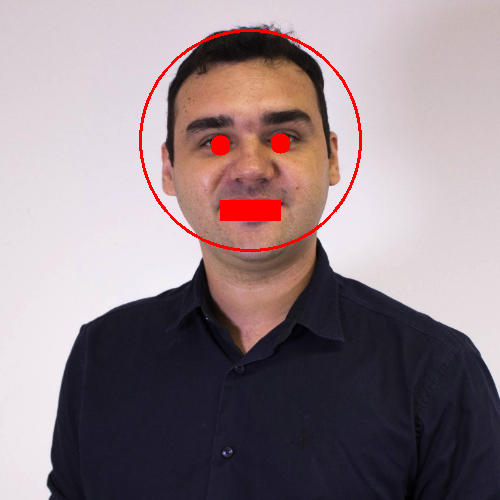

In [ ]:
# Podemos utilizar os recurso de anotação para demarcar a localização da face, 
# dos olhos e boca em uma imagem.

#image = cv2.imread('eu.png')
image = cv2.imread('/content/gdrive/MyDrive/01 - Processamento de Imagem/eu.png')

cv2.circle(image, (250, 140), 110, (0, 0, 255), 2)
cv2.circle(image, (220, 145), 10, (0, 0, 255), -1)
cv2.circle(image, (280, 143), 10, (0, 0, 255), -1)
cv2.rectangle(image, (220, 200), (280, 220), (0, 0, 255), -1)

cv2_imshow(image)

#Processamento de Imagens

Sem dúvidas, as tarefas de Visão Coputacional envolvem muito processamento de imagem. O tratamento da imagem para que os algoritmos de VC consigam operar melhor sobre elas é fundamental.

Como lidamos quase sempre com Aprendizado de Máquina nas aplicações atuais, o pré-processamento é etapa fundamental para garantir um desempenho dos algoritmos.

Vamos ver aqui algumas transformações que devem ser úteis para manipular as imagens.

Vale salientar que as transformações de translação, rotação e redimensionamento são feitas dentro do espaço posicional da imagem, ou seja, levam em consideração os valores de (x,y) dos pixels e não (necessariamente) os valores em si (RGB) dos pixels.

## Translação

A translação consiste em deslocar a imagem dentro dos eixos *x* e *y*. Isso faz com que elas se movam para direita, esquerda, cima e baixo.

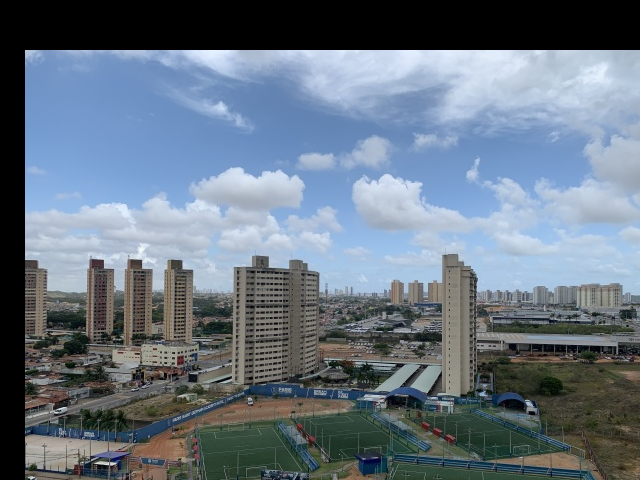

In [ ]:
# carrega a imagem.
#image = cv2.imread('imagem.jpg')
image = cv2.imread('/content/gdrive/MyDrive/01 - Processamento de Imagem/imagem.jpg')

# NOTE: a transção consiste em uma matriz de operação na forma:
#	[[1, 0, shiftX], [0, 1, shiftY]]

# O OpenCV possui uma função para realizar a transformação com as operações sobre
# as matrizes da imagem e do operador de translação (e os demais operadores também).
# Basta especificar quantos pixels se quer deslocar na matriz apontada anteriormente.


# Vamos, por exemplo, transladar uma imagem 25 pixels para a direita e 50 pixels 
# para baixo.

#	Especificar no formato [[1, 0, shiftX], [0, 1, shiftY]]
M = np.float32([[1, 0, 25], [0, 1, 50]])

# Aplicar a função warpAffine passando a imagem, a transformação e a largura e altura
# da imagem.
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

cv2_imshow(shifted)

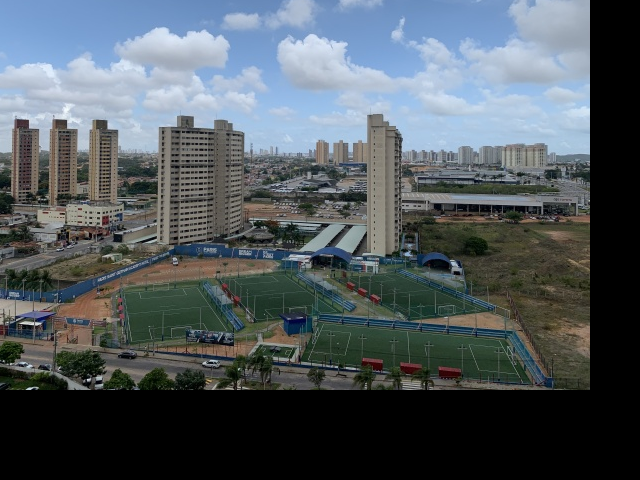

In [ ]:
# agora, vamos deslocar a imagem 50 pixels para a esquerda e 90 pixels para cima.
# Isso pode ser feito atribuindo valores negativos. 

M = np.float32([[1, 0, -50], [0, 1, -90]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
cv2_imshow(shifted)

In [ ]:
# Para facilitar, podemos definir uma função que faz esse papel, ao invés de ficar
# usando a função warpAffine do OpenCV diretamento no código.

def translate(image, x, y):
	# define a matriz de translação e realiza a operação.
	M = np.float32([[1, 0, x], [0, 1, y]])
	shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
  # retorna a imagem já deslocada.
	return shifted

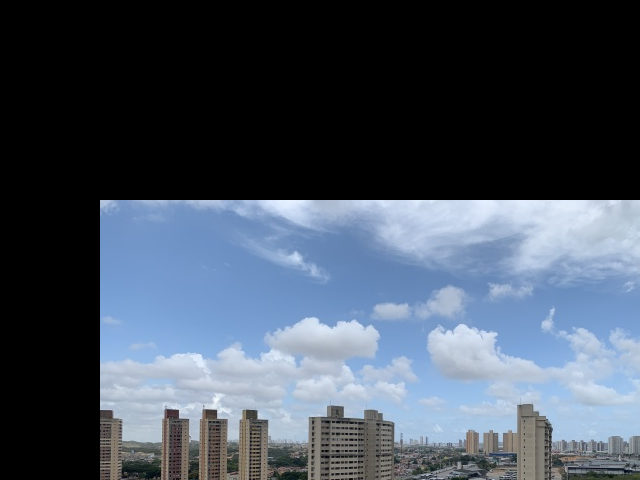

In [ ]:
shifted = translate(image,100,200)
cv2_imshow(shifted)

## Rotação

A rotação, como o próprio nome já informa, rotaciona a imagem em uma quantidade de graus definida. Vale salientar que a rotação é feita por padrão com base no centro da imagem.

O OpenCV, no entanto, permite que outros pontos sejam definidos como base para a rotação. Basta que sejam passados os pontos específicos como primeiro parâmetro da função (diferentes do centro da imagem).

Vamos começar, já definindo uma função para realizar a rotação para fins de facilitação na intepretação do código.

*__Nota__: a operação de rotação sempre é realizada no sentido anti-horário*

*__Nota 2__: a imagem deve ficar cortada quando a rotação é feita uma vez que o espaço alocado para ela (o canvas) não mudou. Então, caso seja desejado que a imagem seja completamente mostrada, o espaço deve ser realocado*

In [ ]:
# Função que realiza a rotação em torno do centro da imagem.
def rotate(image,degree):

  # calcula o centro da imagem com base nas suas dimensões.
  (h, w) = image.shape[:2]
  (cX, cY) = (w / 2, h / 2)

  # rotaciona a imagem em degree graus.
  M = cv2.getRotationMatrix2D((cX, cY), degree, 1.0)
  rotated = cv2.warpAffine(image, M, (w, h))

  # retorna a imagem rotacionada.
  return rotated

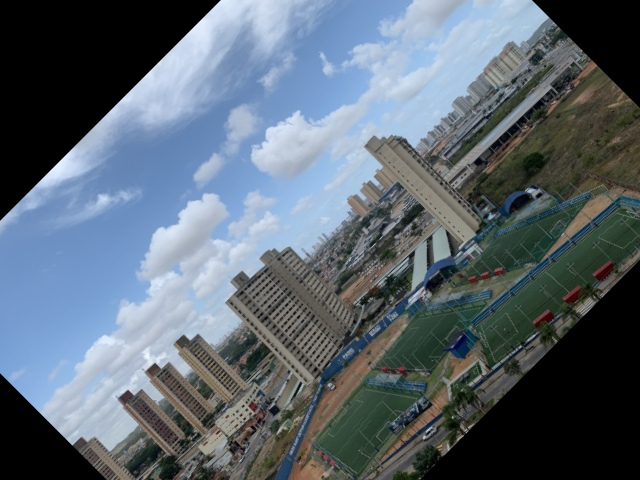

In [ ]:
# rotate image by 45 degrees
rotated = rotate(image,45)
cv2_imshow(rotated)

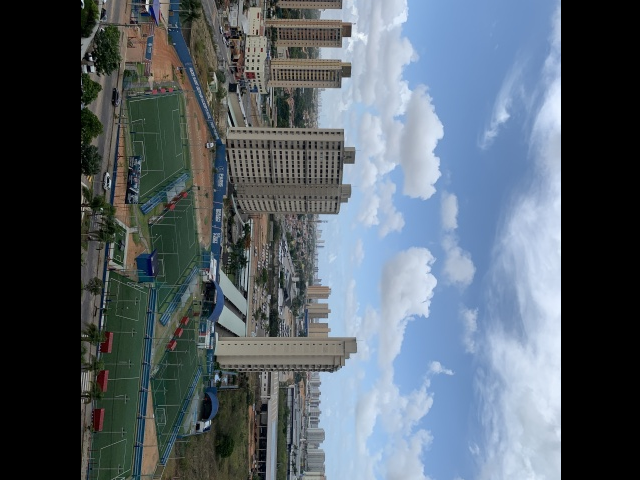

In [ ]:
# rotaciona a imagem em -90 graus.
rotated = rotate(image,-90)
cv2_imshow(rotated)

## Redimensionamento

O redimensionamento é muito útil uma vez que as imagens fornecidas para análise nem sempre são padronizadas. Em geral, precisamos redimensionar imagens para adequar as imagens a nossa arquitetura de projetos.

Uma observação importante ao realizar o redimensionamento é a relação largura x altura (o aspect ratio - AR). Com exceção de poucas situações, vamos querer sempre manter o AR ao redimensionar as imagens.

Um aspecto particular do redimensionamento é que ele envolve o conceito de interpolação. A interpolação é utilizada para preencher os novos espaços quando uma nova é imagem é gerada com tamanho diferente da original.

Quando reduzimos uma imagem, o processo é mais simples, já que basta remover alguns pixels (no geral). Mas, para aumentar o tamanho, novos pixels são acrescenteados e o valor deles depende é calculado com base nos vizinhos dos pixels da imagem original.

O OpenCV oferta uma gama de possíveis algoritmos de interpolação. Alguns são mais "realistas", mas consomem mais custo computacional; outros são mais simples, mas bastante eficientes em termo de tempo de execução. Por isso, eles devem ser utilizados com base na necessidade e restrições que sua aplicação tenha.

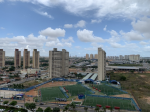

In [ ]:
# Para manter o AR da imagem, devemos primeiro obter a relação largura x altura
# da imagem original. 

# Se quisermos deixar a imagem com uma nova largura de 150 pixels, devemos verificar 
# qual a relação entre 150 e a largura original da imagem.
r = 150.0 / image.shape[1]

# Após isso, a nova altura é calculada com base no valor obtido.
dim = (150, int(image.shape[0] * r))

# realizar o redimensionamento através do OpenCV. 
resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
cv2_imshow(resized)

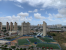

In [ ]:
# Se quisermos fazer o ajuste da altura da imagem utilizamos o mesmo conceito, mas 
# devemos manter o AR e calculá-lo utilizando como base a altura.

# Vamos redimensioanr a imagem para ter 50 pixels de altura.
r = 50.0 / image.shape[0]
dim = (int(image.shape[1] * r), 50)

resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
cv2_imshow(resized)

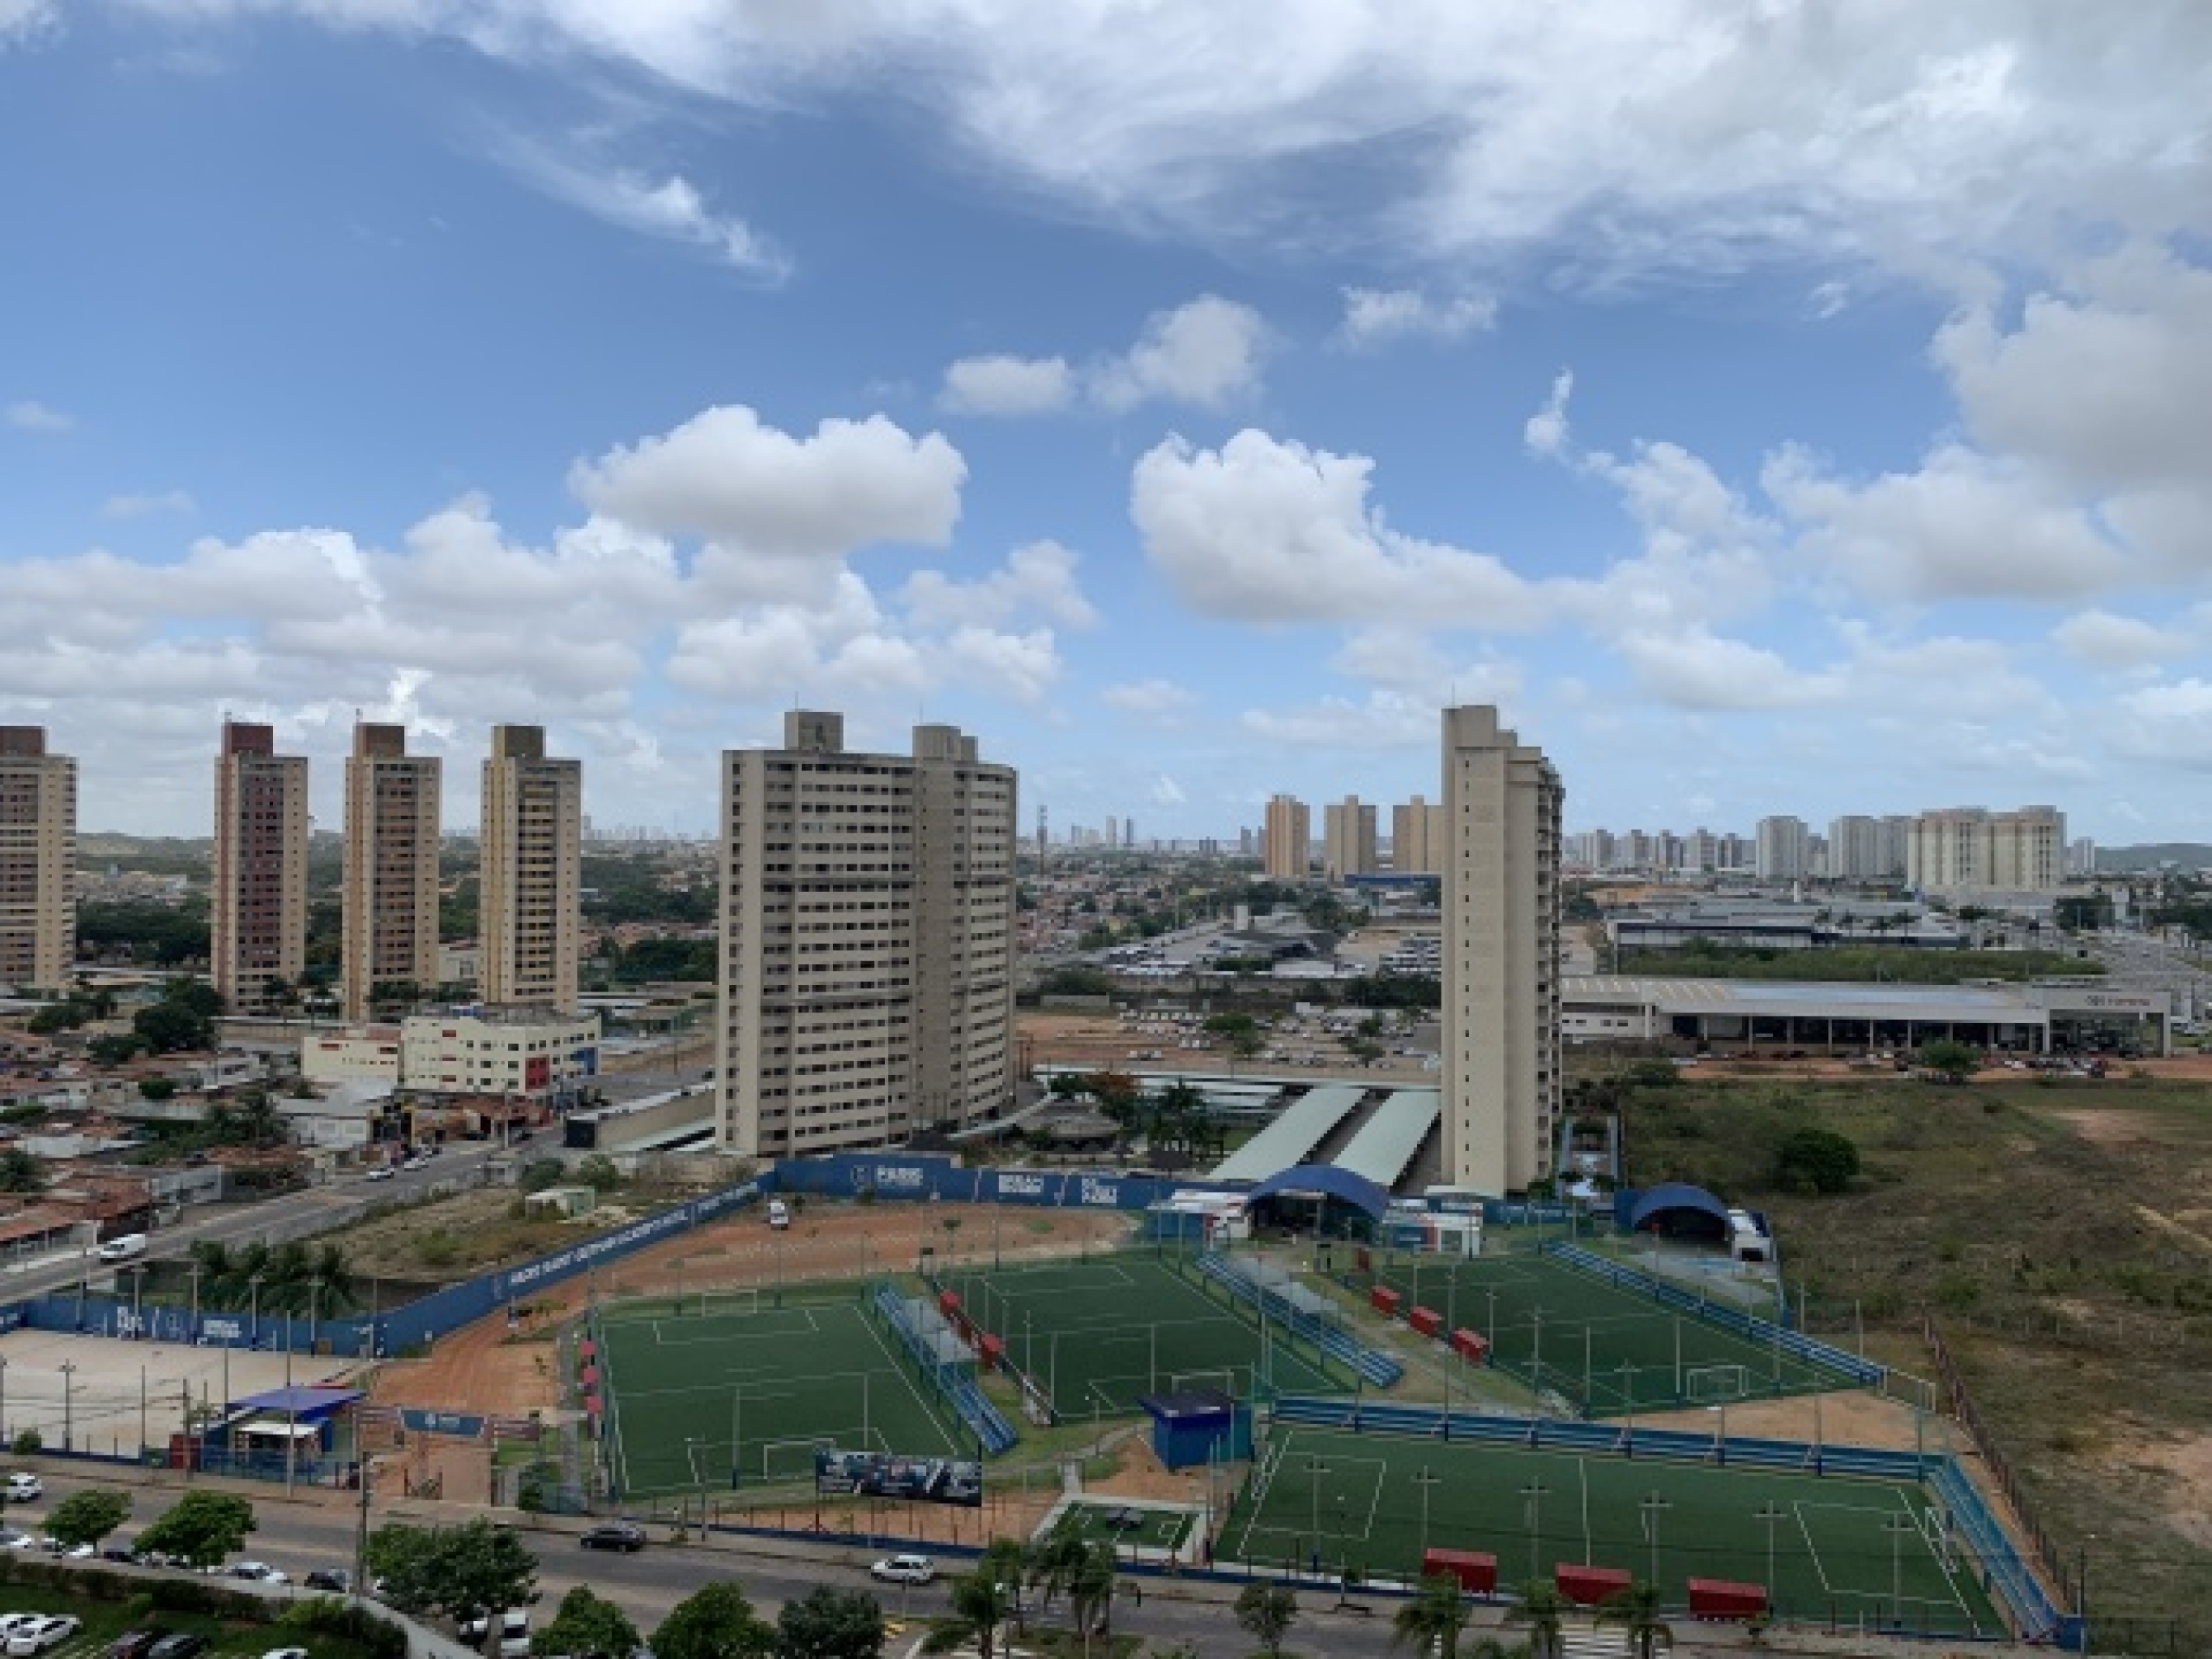

In [ ]:
# Agora para um tamanho maior

# Vamos redimensioanr a imagem para ter 1080 pixels de altura.
r = 2048.0 / image.shape[0]
dim = (int(image.shape[1] * r), 2048)

resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
cv2_imshow(resized)

In [ ]:
# Como fizemos com as demais transformações, vamos definir uma função nossa para 
# realizar o redimensionamento.
def resize(image, width=None, height=None, inter=cv2.INTER_AREA):
	
  # inicializa as dimensões da imagem e obtém o tamanho da imagem original.
	dim = None
	(h, w) = image.shape[:2]
	# se ambas a altura e largura forem None, retorna a imagem original.  
	if width is None and height is None:
		return image
	
    # calcula o AR com base na altura.
	if width is None:		
		r = height / float(h)
		dim = (int(w * r), height)
	# caso contrário, calcula o AR com base na largura.
	else:
		r = width / float(w)
		dim = (width, int(h * r))
	
  # redimensiona a imagem.
	resized = cv2.resize(image, dim, interpolation=inter)
	
  # retorna a imagem redimensionada.
	return resized

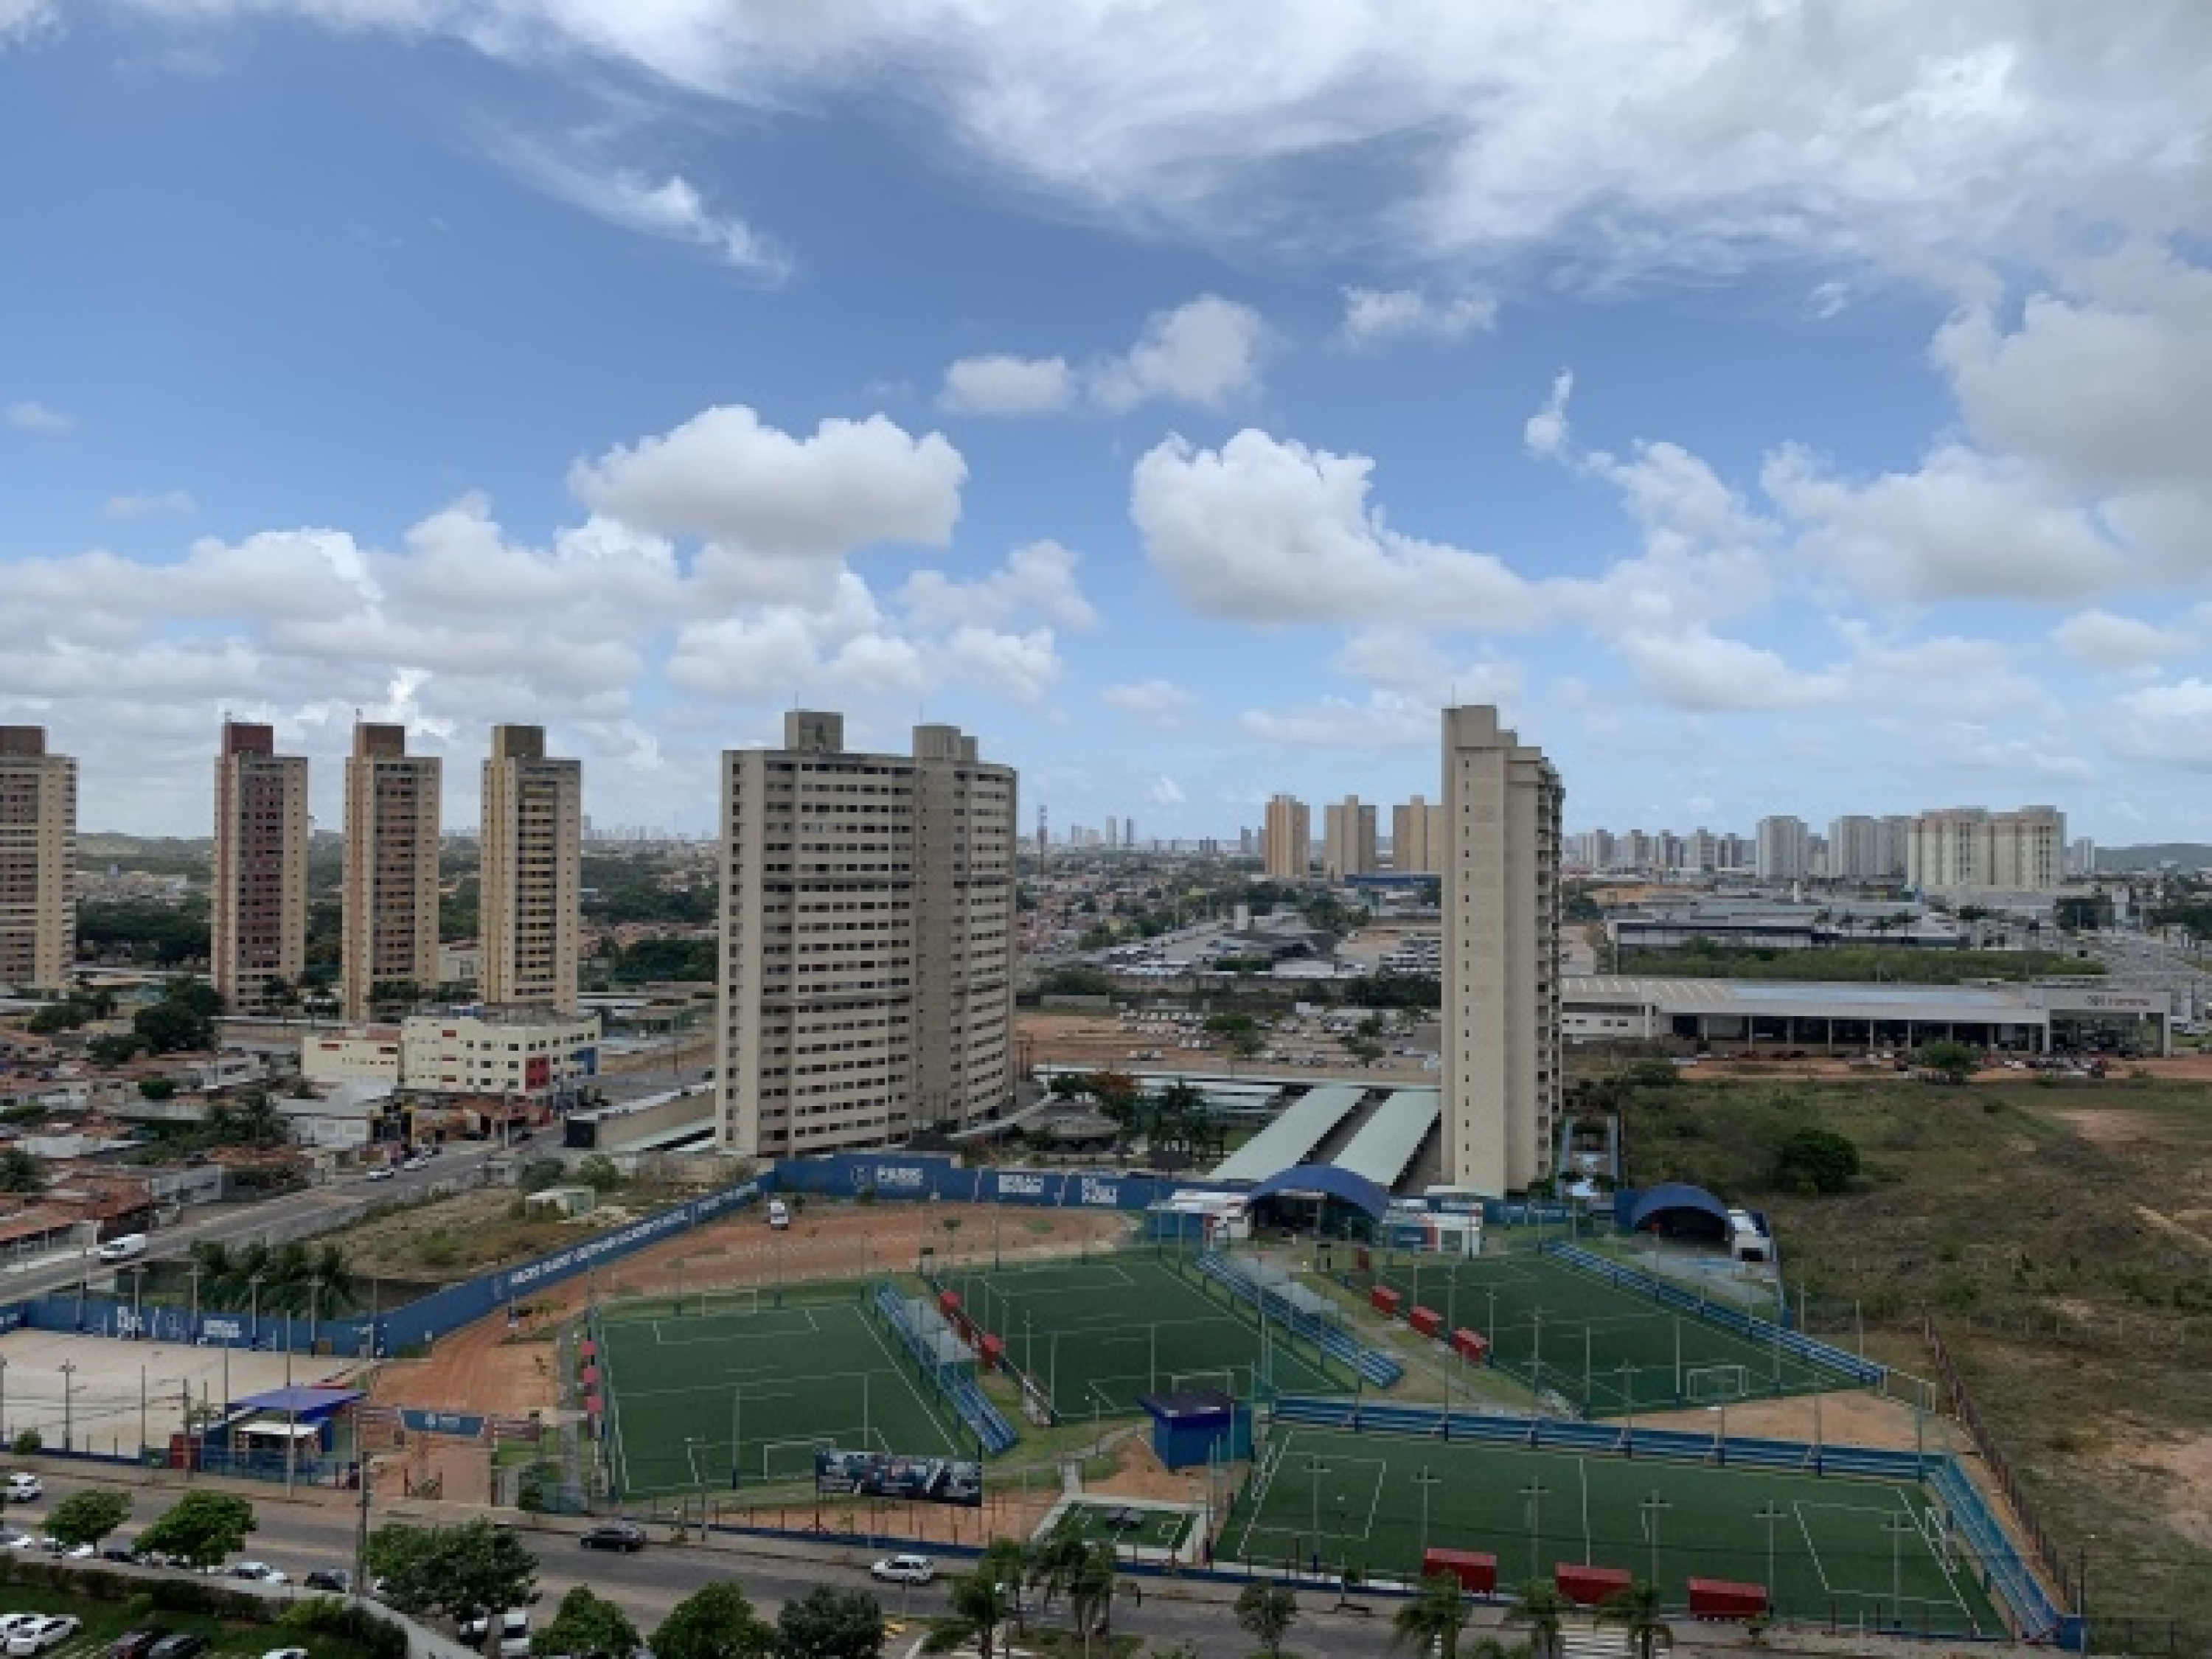

In [ ]:
resized = resize(image, width = 3000)
cv2_imshow(resized)